# 휴대폰 브랜드 이탈 고객 조사

In [273]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

In [274]:
# 폰트 한글화 세팅

# # window font setting
# font_path = 'C:/Windows/Fonts/batang.ttc'           # 한글 폰트를 적용하여 시각화

# # PJE font setting
plt.rcParams['font.family'] = 'Malgun Gothic' 

# mac font setting
#font_path = '/Library/Fonts/Arial Unicode.ttf'
#font = fm.FontProperties(fname=font_path).get_name()
#matplotlib.rc('font', family=font)



In [275]:
# 각 년도 데이터 불러오기
phone21_df = pd.read_csv("./data/p21v30_KMP_csv.csv", encoding='euc-kr', low_memory=False)
phone22_df = pd.read_csv("./data/p22v30_KMP_csv.csv", encoding='euc-kr', low_memory=False)
phone23_df = pd.read_csv("./data/p23v30_KMP_csv.csv", encoding='euc-kr', low_memory=False)

In [276]:
# 각 년도별 데이터 수
print(phone21_df['pid'].count())
print(phone22_df['pid'].count())
print(phone23_df['pid'].count())

10154
9941
9757


In [277]:
# 데이터 통일

merged_df = pd.merge(phone22_df, phone21_df, 
                    on='pid',  # pid 컬럼으로 조인
                    how='inner',  # inner join 수행
                    suffixes=('_22', '_21'))  # 중복되는 컬럼명 구분을 위한 접미사
merged_df = pd.merge(phone23_df, merged_df, 
                    on='pid',  # pid 컬럼으로 조인
                    how='inner',  # inner join 수행
                    suffixes=('_23', ''))  # 중복되는 컬럼명 구분을 위한 접미사

# merge한 데이터 확인
print("원본 데이터프레임 크기:")
print(f"2023년 데이터: {phone23_df.shape}")
print(f"2022년 데이터: {phone22_df.shape}")
print(f"2021년 데이터: {phone21_df.shape}")
print("\n조인 결과 데이터프레임 크기:")
print(f"병합된 데이터: {merged_df.shape}")
print("\n매칭된 고유 pid 수:", merged_df['pid'].nunique())

원본 데이터프레임 크기:
2023년 데이터: (9757, 512)
2022년 데이터: (9941, 536)
2021년 데이터: (10154, 517)

조인 결과 데이터프레임 크기:
병합된 데이터: (9133, 1563)

매칭된 고유 pid 수: 9133


In [278]:
# 기본적으로 merge_notna_df로 데이터 적용한다.

# 제조사 데이터 확인
print(merged_df['p21a03028'].unique())

print(merged_df['p21a03028'].count())
print(merged_df['p21a03028'].head())
print(merged_df['p21a03028'].count())

merged_notna_df = merged_df[merged_df['p21a03028'] != ' ']

merged_samsung_df = merged_df[merged_df['p21a03028'] == '1']
merged_els1_df = merged_df[merged_df['p21a03028'] == '2']
merged_els2_df = merged_df[merged_df['p21a03028'] == '3']

print(f'all: {merged_notna_df['p21a03028'].count()}')       # 총 제조사 수
print(f'samsung: {merged_samsung_df['p21a03028'].count()}') # 삼성의 제조사 수
print(f'els1: {merged_els1_df['p21a03028'].count()}')       # 삼성 이외의 제조사1 수
print(f'els2: {merged_els2_df['p21a03028'].count()}')       # 삼성 이외의 제조사2 수


['1' '3' '2' ' ' '6' '4' '5' '7']
9133
0    1
1    1
2    3
3    2
4    1
Name: p21a03028, dtype: object
9133
all: 8342
samsung: 6846
els1: 692
els2: 784


---
### 특성 정보 

- 5 - 이메일, 메신저, 블로그, 클라우드 사용 여부
    - 이메일                        p21d08001    
    - 메신저                        p21d22001    
    - 블로그                        p21d10001    
    - 클라우드                      p21d12001 
- 6 - 온라인 음성통화 여부             p21a03032 
- 10 - 1년간 서비스 구매 이용 채널      p21i01001        
- 12 - 라이브 커머스 구매 경험         p21i03001 (없)    -> 21년도가 없기 때문에 사용 x
- 14 - 모바일 간편 송금 및 신용카드 저장 여부                               
    - 모바일 간편 송금               p21i02001 
    - 신용카드 저장  (모바일에 신용카드 저장)p21i02004
                                  
                                  
- 15 - 가격(Max 4자리 int)      
    - 통신사 가격                   p21c01001
    - 기기 가격                     p21c01003
- 17 - 가격 부담(부모 or 자신)       p22c02001

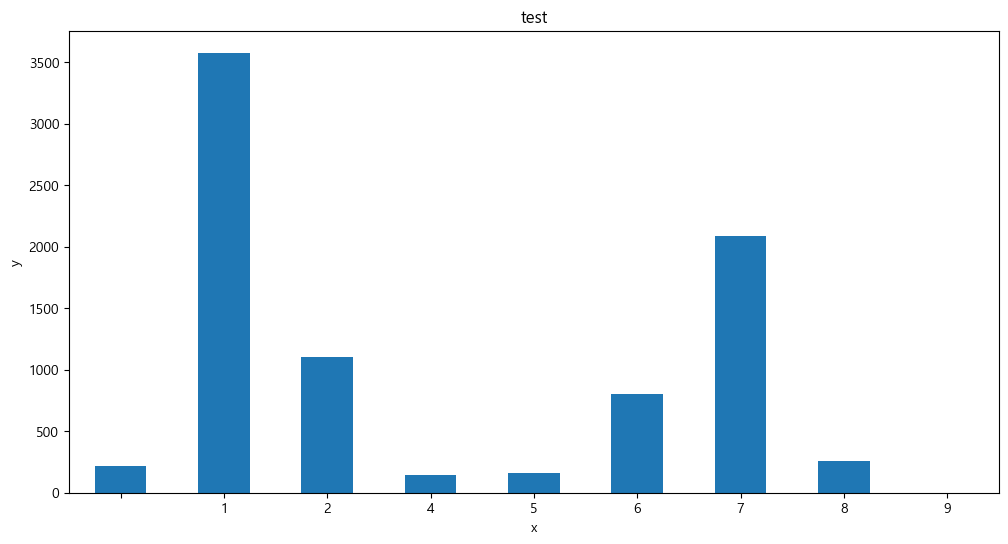

In [279]:
merged_notna_df['p21i01001'].unique
marry_counts = merged_notna_df['p21i01001'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
marry_counts.plot(kind='bar')
plt.xlabel('x')
plt.ylabel('y')
plt.title('test')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()

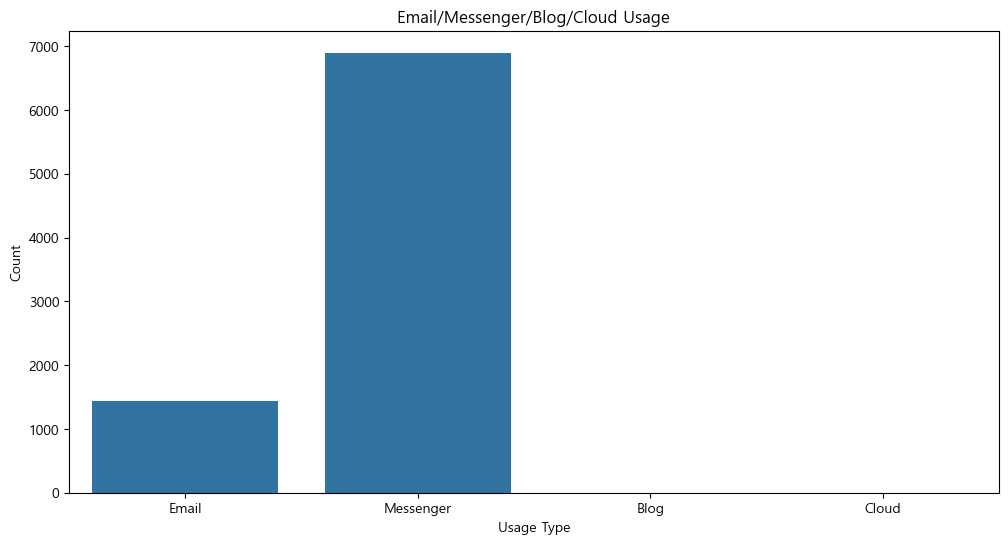

In [280]:
# 문5 - 이메일, 메신저, 블로그, 클라우드 등 (p21d08001, p21d22001, p21d10001, p21d12001)

# 사용 유형(Usage Type) 컬럼 지정 (예: p21c05001)  (p21d12001 사용)
usage_col = "p21d12001"

# 숫자로 변환 (문자열 섞인 데이터 처리)
merged_notna_df.loc[:, usage_col] = pd.to_numeric(merged_notna_df[usage_col], errors='coerce')

# NaN 값 제거
df = merged_notna_df.dropna(subset=[usage_col])

# 정수형 변환 (X축을 정렬하기 위해)
df.loc[:, usage_col] = df[usage_col].astype(int)

# 숫자 값과 카테고리 매핑
usage_mapping = {1: "Email", 2: "Messenger", 3: "Blog", 4: "Cloud"}
df = df[df[usage_col].isin(usage_mapping.keys())]  # 필요한 값만 필터링
df["Usage Type"] = df[usage_col].map(usage_mapping)

# 데이터 정렬 후 그래프 생성
plt.figure(figsize=(12, 6))
sns.countplot(x=pd.Categorical(df["Usage Type"], categories=usage_mapping.values(), ordered=True))
plt.title("Email/Messenger/Blog/Cloud Usage")
plt.xlabel("Usage Type")
plt.ylabel("Count")
plt.show()

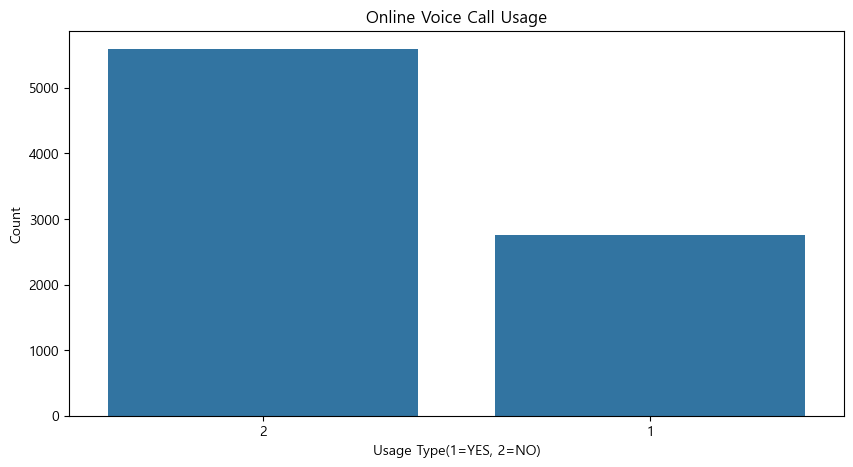

In [281]:
# 온라인 음성통화 사용 여부 ('p21a03032') 
# 수정 필요             (p21a03032)

# `p21a03032` 값 2를 0으로 변경
merged_notna_df.loc[:, 'p21a03032'] = merged_notna_df['p21a03032'].replace(2, 0)
plt.figure(figsize=(10, 5))
sns.countplot(x=merged_notna_df['p21a03032'].dropna())
plt.title("Online Voice Call Usage")
plt.xlabel("Usage Type(1=YES, 2=NO)")
plt.ylabel("Count")
plt.show()

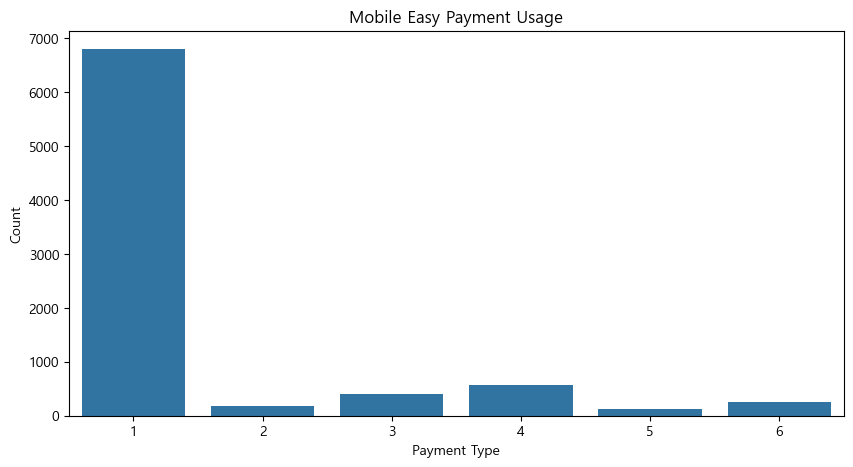

In [282]:
# 모바일 간편 송금 및 신용카드 저장 (`p21d14001`, `p21d14002`)
plt.figure(figsize=(10, 5))
sns.countplot(x=merged_notna_df["p21d14001"].dropna())
plt.title("Mobile Easy Payment Usage")
plt.xlabel("Payment Type")
plt.ylabel("Count")
plt.show()

C:\Users\Playdata\AppData\Local\Temp\ipykernel_216\728984489.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Yes - <12 times/year' 'No Card Stored' nan ... 'No Mobile Payment'
 'No Mobile Payment' 'No Mobile Payment']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_notna_df.loc[:, mobile_payment_col] = merged_notna_df[mobile_payment_col].map(payment_labels)
C:\Users\Playdata\AppData\Local\Temp\ipykernel_216\728984489.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['Yes - <12 times/year' 'No Card Stored' nan ... 'No Mobile Payment'
 'No Mobile Payment' 'No Mobile Payment']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_notna_df.loc[:, credit_card_col] = merged_notna_df[credit_card_col].map(payment_labels)


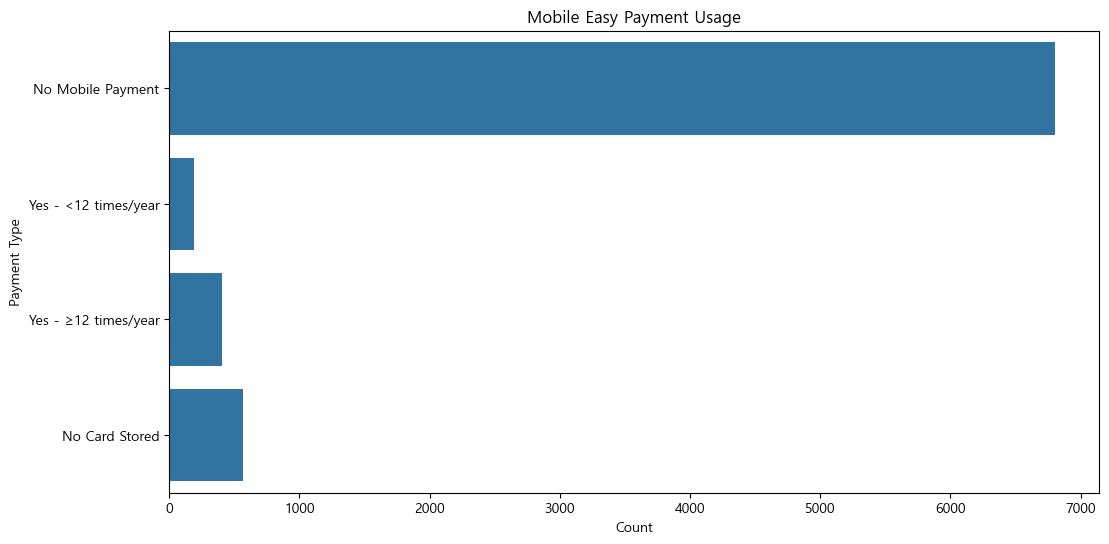

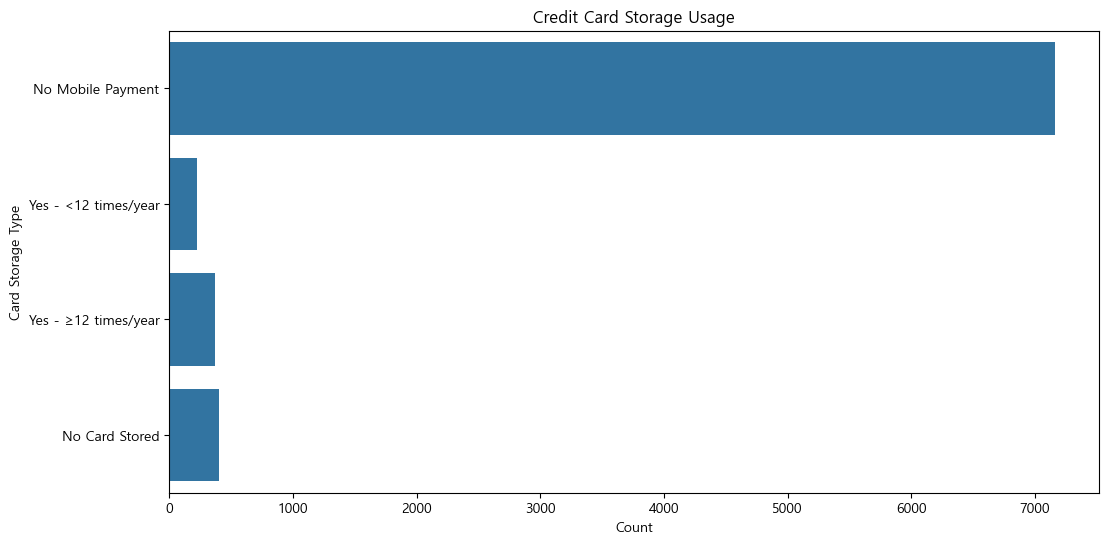

In [283]:
# 간편 송금 및 신용카드 저장 컬럼 선택
mobile_payment_col = "p21d14001"  # 모바일 간편 송금
credit_card_col = "p21d14002"  # 신용카드 저장

# 응답 값 의미 매핑
payment_labels = {
    1: "No Mobile Payment",
    2: "Yes - <12 times/year",
    3: "Yes - ≥12 times/year",
    4: "No Card Stored"
}

# 값 변환
merged_notna_df.loc[:, mobile_payment_col] = merged_notna_df[mobile_payment_col].map(payment_labels)
merged_notna_df.loc[:, credit_card_col] = merged_notna_df[credit_card_col].map(payment_labels)

#  모바일 간편 송금 사용 현황 시각화
plt.figure(figsize=(12, 6))
sns.countplot(y=merged_notna_df[mobile_payment_col].dropna(), order=payment_labels.values())  # Y축으로 표현하여 가독성 증가
plt.title("Mobile Easy Payment Usage")
plt.xlabel("Count")
plt.ylabel("Payment Type")
plt.show()

#  신용카드 저장 여부 시각화
plt.figure(figsize=(12, 6))
sns.countplot(y=merged_notna_df[credit_card_col].dropna(), order=payment_labels.values())  # Y축으로 표현하여 가독성 증가
plt.title("Credit Card Storage Usage")
plt.xlabel("Count")
plt.ylabel("Card Storage Type")
plt.show()

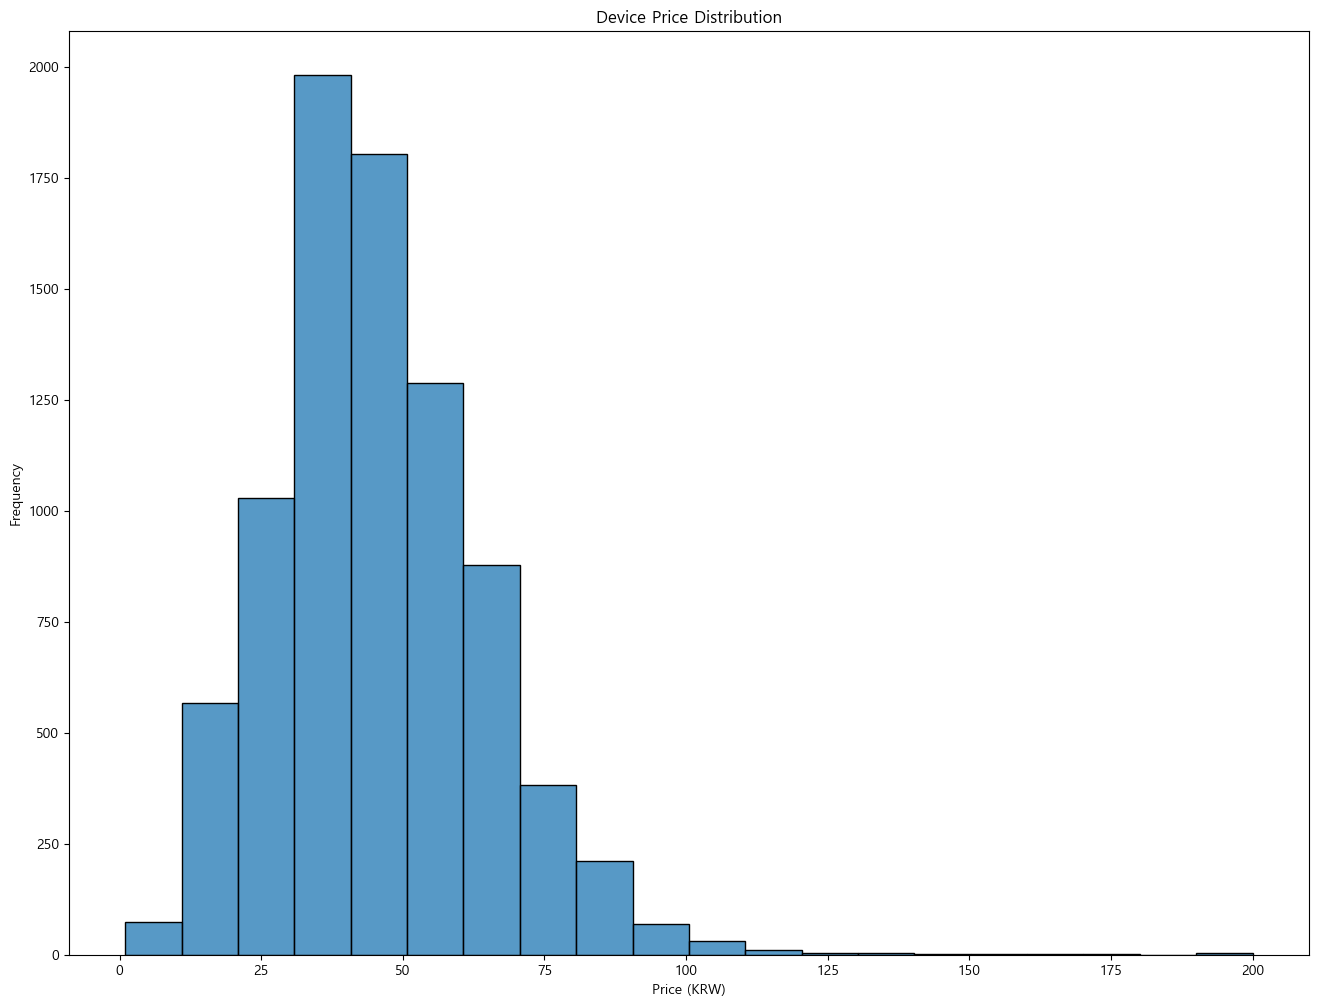

In [284]:
merged_notna_df.loc[:, 'p21c01001'] = pd.to_numeric(merged_notna_df['p21c01001'], errors='coerce')

### 통신사 가격 (문15-1) (p21c01001)
plt.figure(figsize=(16, 12))
sns.histplot(merged_notna_df["p21c01001"].dropna(), bins=20)
plt.title("Device Price Distribution")
plt.xlabel("Price (KRW)")
plt.ylabel("Frequency")
plt.xticks(rotation=0) 
plt.show()

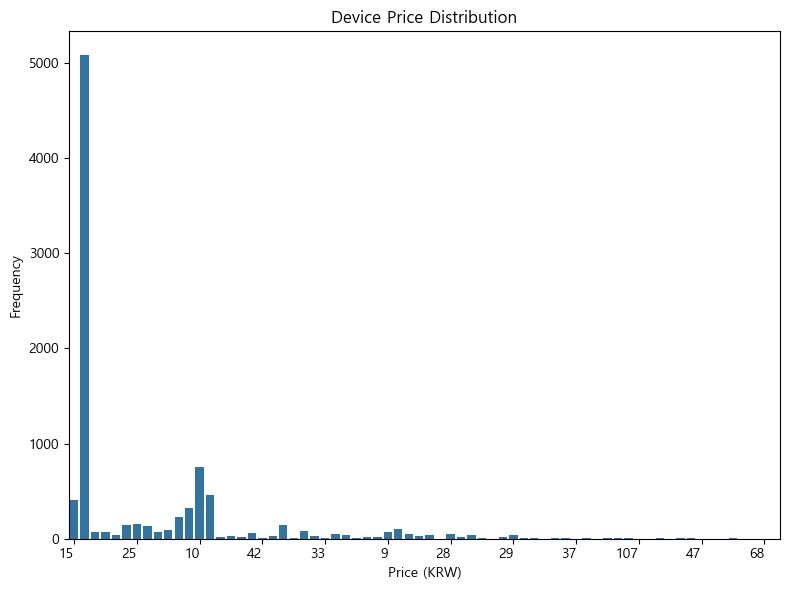

In [285]:
###  기기 가격 (문15-2) (p21c01003)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=merged_df["p21c01003"].dropna())
plt.title("Device Price Distribution")
plt.xlabel("Price (KRW)")
plt.ylabel("Frequency")

# x축 레이블 10개만 표시
num_labels = len(ax.get_xticklabels())
step = num_labels // 10  # 10개 간격으로 레이블 표시
ax.set_xticks(range(0, num_labels, step))
ax.set_xticklabels(merged_df["p21c01003"].dropna().unique()[::step], rotation=0, ha="right")  # 45도 회전, 오른쪽 정렬

plt.tight_layout()  # 그래프 주변 여백 조절
plt.show()

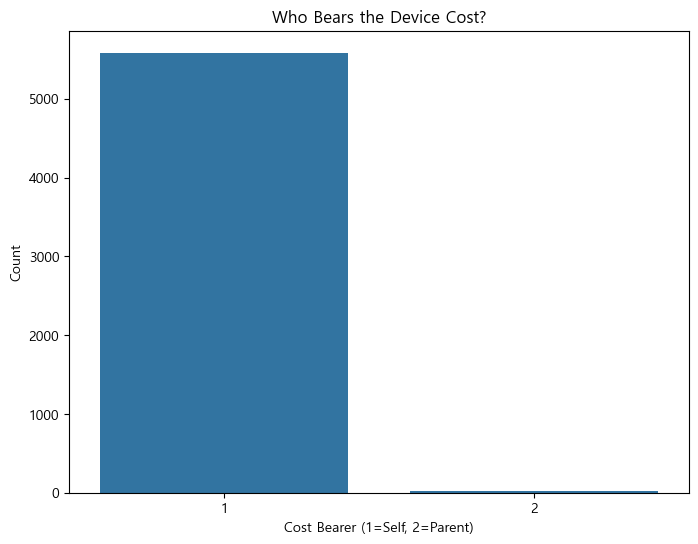

In [286]:
###  가격 부담 (부모 or 자신) (문17) (p22c02001)
plt.figure(figsize=(8, 6))
# 원하는 순서대로 x축 레이블 지정
order = [1, 2]  
sns.countplot(x=merged_notna_df["p22c02001"].dropna(), fill=True, order=order)
plt.title("Who Bears the Device Cost?")
plt.xlabel("Cost Bearer (1=Self, 2=Parent)")
plt.ylabel("Count")

plt.show()

---
### phone 문항 (26번)
- 15 스마트폰 구분 (데이터 구별)    p21a03002
- 16 스마트폰 DMB 기능           p21a03004
- 17 스마트폰 통신사              p21a03008
- 18-1 음성 무제한 서비스 유무     p21a03024
- 18-2 데이터 무제한 서비스 유무    p21a03026
- 20 스마트폰 사용 기간           p21a03038
- 21 스마트폰 제조사              p21a03028


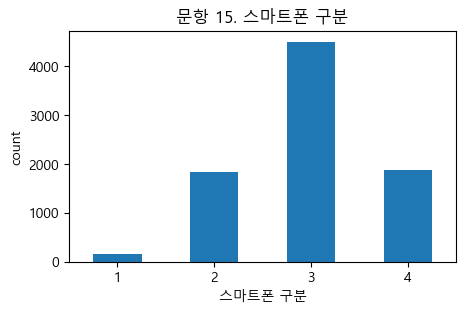

In [287]:
# 15 p__a03002 스마트폰 구분 (1~4)
# [휴대폰 및 스마트 기기 보유 및 이용 현황] 스마트폰 구분 - 스마트폰 1
# ① 3G 스마트폰 
# ② LTE 스마트폰
# ③ LTE-A 스마트폰
# ④ 5G 스마트폰

merged_notna_df['p21a03002']
n_15_counts_21 = merged_notna_df['p21a03002'].value_counts().sort_index()

plt.figure(figsize=(5, 3))
n_15_counts_21.plot(kind='bar')
plt.xlabel('스마트폰 구분')
plt.ylabel('count')
plt.title('문항 15. 스마트폰 구분')
plt.xticks(rotation=0)
plt.show()

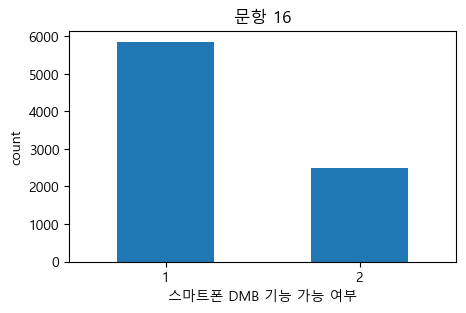

In [288]:
# 16 지상파 DMB (DMB 유무)
# [휴대폰 및 스마트 기기 보유 및 이용 현황] 스마트폰 지상파 DMB 기능 가능 여부 - 스마트폰 1
# 1: 있음, 2: 없음 

n_16_counts_21 = merged_notna_df['p21a03004'].value_counts().sort_index()
plt.figure(figsize=(5, 3))
n_16_counts_21.plot(kind='bar')
plt.xlabel('스마트폰 DMB 기능 가능 여부')
plt.ylabel('count')
plt.title('문항 16')
plt.xticks(rotation=0)
plt.show()

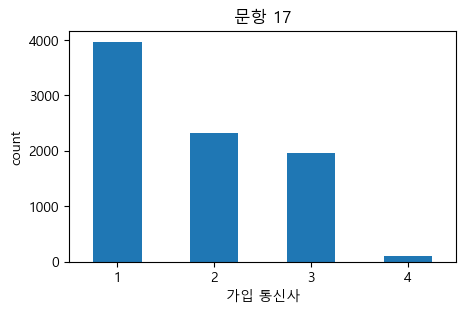

In [289]:
# 17 가입한 통신사 (1~4)
# [휴대폰 및 스마트 기기 보유 및 이용 현황] 스마트폰 가입 이동 통신사 - 스마트폰 1
# ① SKT
# ② KT(구 KTF)
# ③ LG U⁺(구 LGT)
# ④ 알뜰폰 서비스(MVNO)
# 예) LG헬로비전(구 CJ헬로모바일), 리브엠 등 

n_17_counts_21 = merged_notna_df['p21a03008'].value_counts().sort_index()

plt.figure(figsize=(5, 3))
n_17_counts_21.plot(kind='bar')
plt.xlabel('가입 통신사')
plt.ylabel('count')
plt.title('문항 17')
plt.xticks(rotation=0)
plt.show()

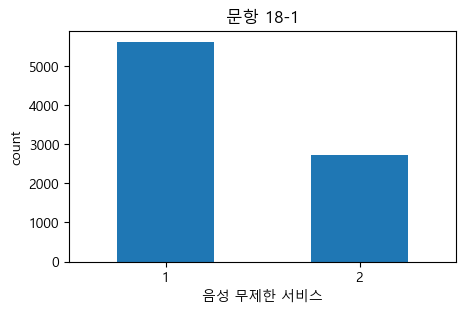

In [290]:
# 18-1 음성 무제한 서비스 (서비스 유무)
n_18_1_counts_21 = merged_notna_df['p21a03024'].value_counts().sort_index()

plt.figure(figsize=(5, 3))
n_18_1_counts_21.plot(kind='bar')
plt.xlabel('음성 무제한 서비스')
plt.ylabel('count')
plt.title('문항 18-1')
plt.xticks(rotation=0)
plt.show()

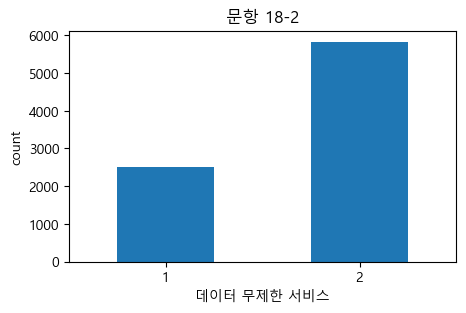

In [291]:
# 18-2 데이터 무제한 서비스 (서비스 유무)

n_18_2_counts_21 = merged_notna_df['p21a03026'].value_counts().sort_index()

plt.figure(figsize=(5, 3))
n_18_2_counts_21.plot(kind='bar')
plt.xlabel('데이터 무제한 서비스')
plt.ylabel('count')
plt.title('문항 18-2')
plt.xticks(rotation=0)
plt.show()

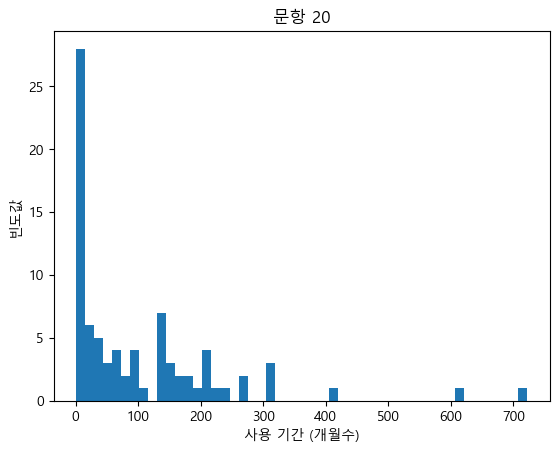

In [292]:
# 20 사용 기간 (날짜를 int로 받아옴)
# p__a03038
n_20_counts_21 = merged_notna_df['p21a03038'].value_counts().sort_index()

plt.hist(n_20_counts_21, bins=50)
plt.xlabel('사용 기간 (개월수)')
plt.ylabel('빈도값')
plt.title('문항 20')
plt.show()

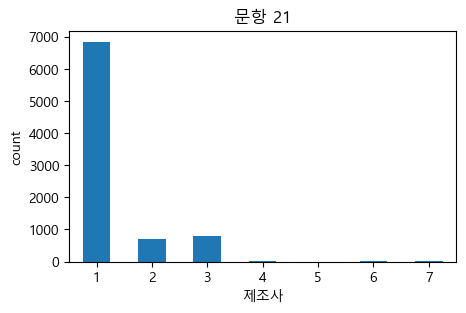

In [293]:
# 21 제조사 (row 값) 
# p__a03028

n_21_counts_21 = merged_notna_df['p21a03028'].value_counts().sort_index()
plt.figure(figsize=(5, 3))
n_21_counts_21.plot(kind='bar')
plt.xlabel('제조사')
plt.ylabel('count')
plt.title('문항 21')
plt.xticks(rotation=0)
plt.show()

---
### 개인정보 문항
- ?? 나이                       p21age
- 35 최종 학력 (학교별로 0~6)      p21school1
- 37 혼인 유무 (1~4)             p21mar
- 38 월평균 소득 (평균 소득 1~18)   p21income1
- 39 직업 유무 (직업 유무)         p21job1
- 40 종교 유무 (종교 유무)         p21relig1

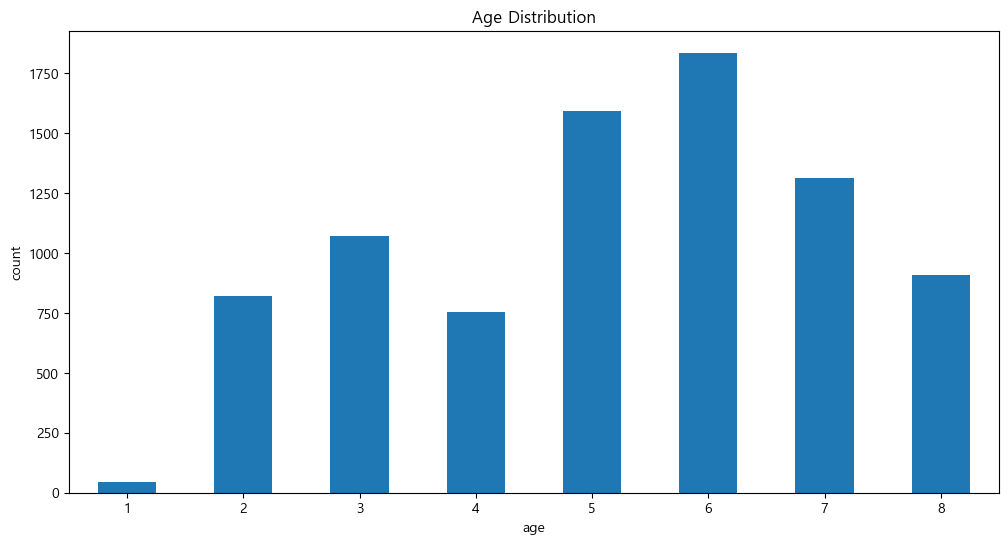

In [294]:
age_counts = merged_notna_df['p21age'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
age_counts.plot(kind='bar')
plt.xlabel('age')
plt.ylabel('count')
plt.title('Age Distribution')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()


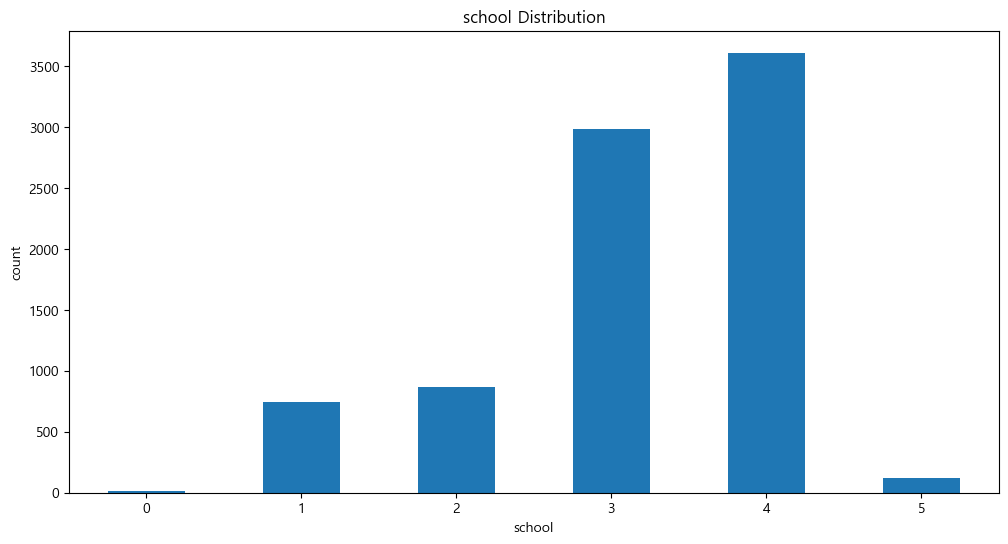

In [295]:
merged_notna_df['p21school1']
school_counts = merged_notna_df['p21school1'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
school_counts.plot(kind='bar')
plt.xlabel('school')
plt.ylabel('count')
plt.title('school Distribution')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()


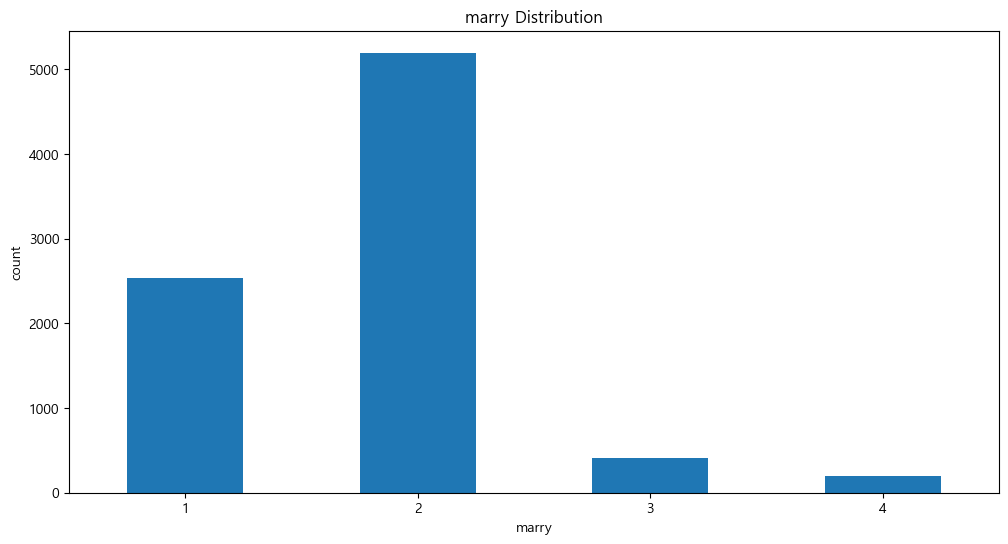

In [296]:
merged_notna_df['p21mar']
marry_counts = merged_notna_df['p21mar'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
marry_counts.plot(kind='bar')
plt.xlabel('marry')
plt.ylabel('count')
plt.title('marry Distribution')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()

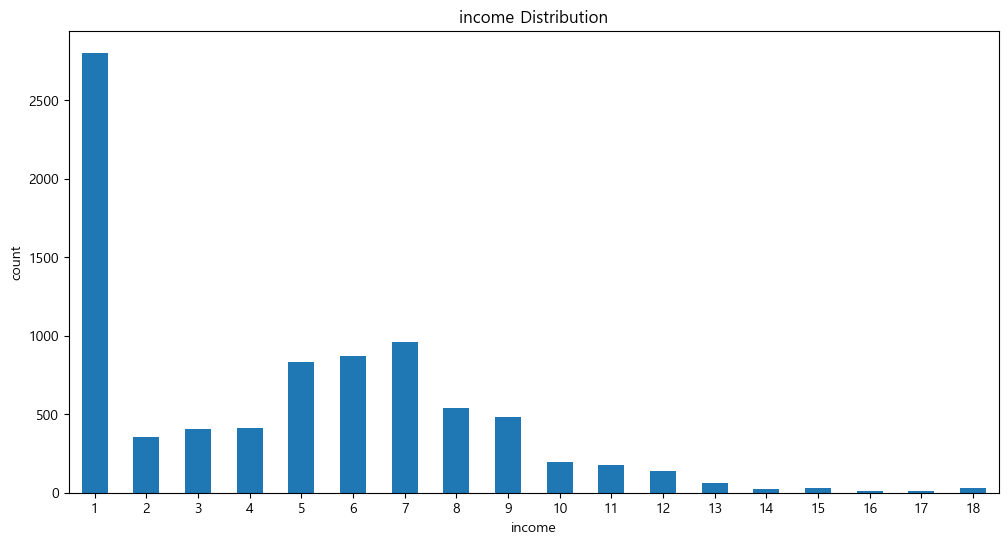

In [297]:
merged_notna_df['p21income1']
income_counts = merged_notna_df['p21income1'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
income_counts.plot(kind='bar')
plt.xlabel('income')
plt.ylabel('count')
plt.title('income Distribution')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()

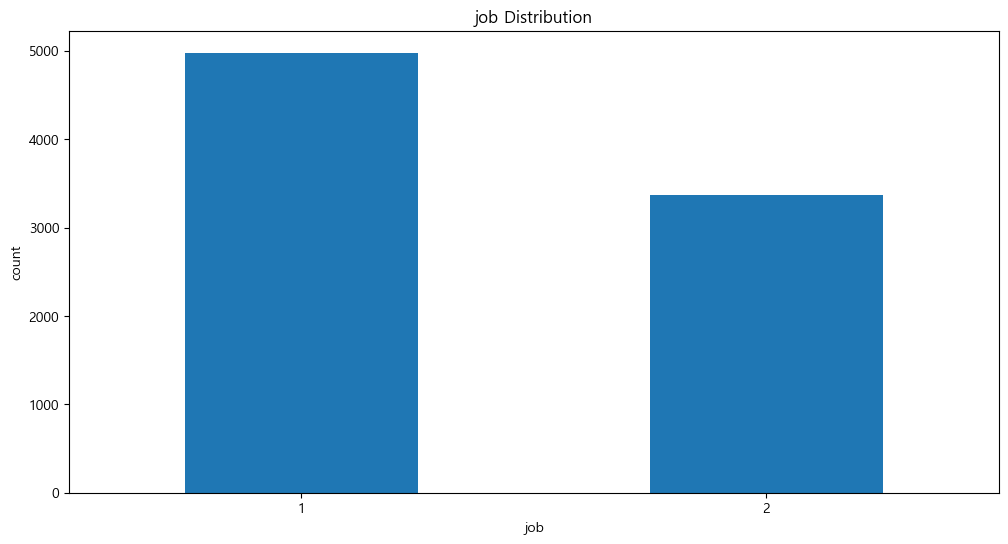

In [298]:
merged_notna_df['p21job1']
job_counts = merged_notna_df['p21job1'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
job_counts.plot(kind='bar')
plt.xlabel('job')
plt.ylabel('count')
plt.title('job Distribution')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()

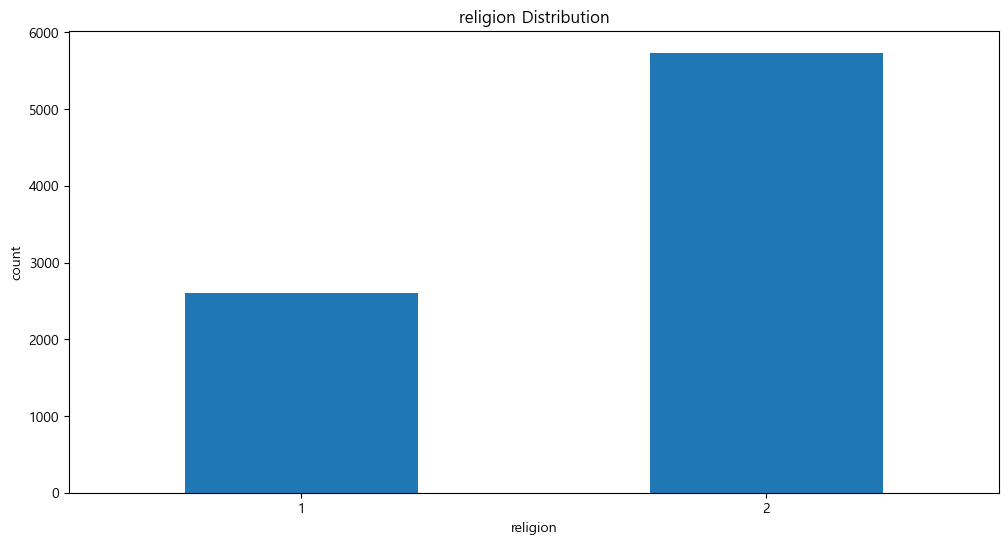

In [299]:
merged_notna_df['p21relig1']
relig_counts = merged_notna_df['p21relig1'].value_counts().sort_index()

plt.figure(figsize=(12, 6))  # 그래프 크기 설정
relig_counts.plot(kind='bar')
plt.xlabel('religion')
plt.ylabel('count')
plt.title('religion Distribution')
plt.xticks(rotation=0)  # x축 라벨 회전
plt.show()

---
### 각 컬럼 명 변경 & csv 파일 생성

- 5 - 이메일, 메신저, 블로그, 클라우드 사용 여부
    - 이메일                        p21d08001      ->   email
    - 메신저                        p21d22001      ->   messenger
    - 블로그                        p21d10001      ->   blog
    - 클라우드                      p21d12001      ->   cloud
- 6 - 온라인 음성통화 여부             p21a03032      ->   call_check   
- 10 - 1년간 서비스 구매 이용 채널      p21i01001      ->   service_purchase
- 14 - 모바일 간편 송금 및 신용카드 저장 여부                               
    - 모바일 간편 송금               p21i02001      ->   money_transfer
    - 신용카드 저장  (모바일에 신용카드 저장)p21i02004   ->   cradit_card
- 15 - 가격(Max 4자리 int)      
    - 통신사 가격                   p21c01001      ->   agency_purchase
    - 기기 가격                     p21c01003      ->    machine_purchase
- 17 - 가격 부담(부모 or 자신)       p22c02001       ->   phone_owner

- 5 - 이메일, 메신저, 블로그, 클라우드 사용 여부
    - 이메일                        p21c05001    ->   email
    - 메신저                        p21c05002    ->   messenger
    - 블로그                        p21c05039    ->   blog
    - 클라우드                      p21c05051    ->   cloud
- 6 - 온라인 음성통화 여부 →            p21c06006   ->   call_check   
- 10 - 1년간 서비스 구매 이용 채널 →     p21d10001   ->   service_purchase
- 12 - 라이브 커머스 구매 경험 →        p21d12001   ->    live_commerce
- 14 - 모바일 간편 송금 및 신용카드 저장 여부
    - 모바일 간편 송금               p21d14001     ->   money_transfer
    - 신용카드 저장                  p21d14002    ->   cradit_card
- 15 - 가격(Max 4자리 int)→      
    - 통신사 가격                   p21c01001    ->   agency_purchase
    - 기기 가격                     p21c01003   ->    machine_purchase
- 17 - 가격 부담(부모 or 자신)→       p22c02001    ->   phone_owner
- 26 스마트폰
    - 15 스마트폰 구분 (데이터 구별)    p21a03002   ->    data
    - 16 스마트폰 DMB 기능           p21a03004   ->    dmb
    - 17 스마트폰 통신사              p21a03008   ->    agency
    - 18-1 음성 무제한 서비스 유무     p21a03024    ->    voice_service
    - 18-2 데이터 무제한 서비스 유무    p21a03026   ->    data_service
    - 20 스마트폰 사용 기간           p21a03038    ->   use_date
    - 21 스마트폰 제조사              p21a03028   ->    brand
- ?? 나이                          p21age      ->    age
- 35 최종 학력 (학교별로 0~6)         p21school1   ->   school
- 37 혼인 유무 (1~4)                p21mar       ->   marry
- 38 월평균 소득 (평균 소득 1~18)      p21income1  ->    salary
- 39 직업 유무 (직업 유무)            p21job1      ->   job
- 40 종교 유무 (종교 유무)            p21relig1    ->   religion

In [300]:
# merged_notna_df[['p21d08001', 'p21d22001', 'p21d10001', 'p21d12001', 'p21a03032', 
#                  'p21i01001', 'p21i02001', 'p21i02004', 'p21c01001', 
#                  'p21c01003', 'p22c02001', 'p21a03002', 'p21a03004', 'p21a03008',
#                  'p21a03024', 'p21a03026', 'p21a03038', 'p21a03028', 'p21age', 
#                  'p21school1', 'p21mar', 'p21income1', 'p21job1', 'p21relig1']] = merged_notna_df[[
#                      'email', 'messenger', 'blog', 'cloud', 'call_check', 
#                      'service_purchase', 'money_transfer', 'cradit_card', 'agency_purchase', 
#                      'machine_purchase', 'phone_owner', 'data', 'dmb', 'agency', 
#                      'voice_service', 'data_service', 'use_date', 'brand', 'age', 
#                      'school', 'marry', 'salary', 'job', 'religion']]


# 필요한 원본 컬럼들과 새로운 컬럼명을 매핑
columns_mapping = {
   # 2021년 컬럼
   'p21d08001': 'email_21', 
   'p21d22001': 'messenger_21',
   'p21d10001': 'blog_21',
   'p21d12001': 'cloud_21',
   'p21a03032': 'call_check_21',
   'p21i01001': 'service_purchase_21',
   'p21i02001': 'money_transfer_21',
   'p21i02004': 'cradit_card_21',
   'p21c01001': 'agency_purchase_21',
   'p21c01003': 'machine_purchase_21',
   'p21c02001': 'phone_owner_21',  # 수정된 부분
   'p21a03002': 'data_21',
   'p21a03004': 'dmb_21',
   'p21a03008': 'agency_21',
   'p21a03024': 'voice_service_21',
   'p21a03026': 'data_service_21',
   'p21a03038': 'use_date_21',
   'p21a03028': 'brand_21',
   'p21age': 'age_21',
   'p21school1': 'school_21',
   'p21mar': 'marry_21',
   'p21income1': 'salary_21',
   'p21job1': 'job_21',
   'p21relig1': 'religion_21',

   # 2022년 컬럼
   'p22d08001': 'email_22',
   'p22d22001': 'messenger_22',
   'p22d10001': 'blog_22',
   'p22d12001': 'cloud_22',
   'p22a03032': 'call_check_22',
   'p22i01001': 'service_purchase_22',
   'p22i02001': 'money_transfer_22',
   'p22i02004': 'cradit_card_22',
   'p22c01001': 'agency_purchase_22',
   'p22c01003': 'machine_purchase_22',
   'p22c02001': 'phone_owner_22',
   'p22a03002': 'data_22',
   'p22a03004': 'dmb_22',
   'p22a03008': 'agency_22',
   'p22a03024': 'voice_service_22',
   'p22a03026': 'data_service_22',
   'p22a03038': 'use_date_22',
   'p22a03028': 'brand_22',
   'p22age': 'age_22',
   'p22school1': 'school_22',
   'p22mar': 'marry_22',
   'p22income1': 'salary_22',
   'p22job1': 'job_22',
   'p22relig1': 'religion_22',

   # 2023년 컬럼
   'p23d08001': 'email_23',
   'p23d22001': 'messenger_23',
   'p23d10001': 'blog_23',
   'p23d12001': 'cloud_23',
   'p23a03032': 'call_check_23',
   'p23i01001': 'service_purchase_23',
   'p23i02001': 'money_transfer_23',
   'p23i02004': 'cradit_card_23',
   'p23c01001': 'agency_purchase_23',
   'p23c01003': 'machine_purchase_23',
   'p23c02001': 'phone_owner_23',
   'p23a03002': 'data_23',
   'p23a03004': 'dmb_23',
   'p23a03008': 'agency_23',
   'p23a03024': 'voice_service_23',
   'p23a03026': 'data_service_23',
   'p23a03038': 'use_date_23',
   'p23a03028': 'brand_23',
   'p23age': 'age_23',
   'p23school1': 'school_23',
   'p23mar': 'marry_23',
   'p23income1': 'salary_23',
   'p23job1': 'job_23',
   'p23relig1': 'religion_23'
}

# pid와 매핑된 컬럼들만 선택하고 이름 변경
merged_notna_df = merged_notna_df[['pid'] + list(columns_mapping.keys())].rename(columns=columns_mapping)

# 결과 확인
print("최종 컬럼 수:", len(merged_notna_df.columns))
print("\n최종 컬럼 목록:")
print(merged_notna_df.columns.tolist())

최종 컬럼 수: 73

최종 컬럼 목록:
['pid', 'email_21', 'messenger_21', 'blog_21', 'cloud_21', 'call_check_21', 'service_purchase_21', 'money_transfer_21', 'cradit_card_21', 'agency_purchase_21', 'machine_purchase_21', 'phone_owner_21', 'data_21', 'dmb_21', 'agency_21', 'voice_service_21', 'data_service_21', 'use_date_21', 'brand_21', 'age_21', 'school_21', 'marry_21', 'salary_21', 'job_21', 'religion_21', 'email_22', 'messenger_22', 'blog_22', 'cloud_22', 'call_check_22', 'service_purchase_22', 'money_transfer_22', 'cradit_card_22', 'agency_purchase_22', 'machine_purchase_22', 'phone_owner_22', 'data_22', 'dmb_22', 'agency_22', 'voice_service_22', 'data_service_22', 'use_date_22', 'brand_22', 'age_22', 'school_22', 'marry_22', 'salary_22', 'job_22', 'religion_22', 'email_23', 'messenger_23', 'blog_23', 'cloud_23', 'call_check_23', 'service_purchase_23', 'money_transfer_23', 'cradit_card_23', 'agency_purchase_23', 'machine_purchase_23', 'phone_owner_23', 'data_23', 'dmb_23', 'agency_23', 'voice_ser

In [301]:
# CSV 파일로 저장 (인덱스는 제외)
merged_notna_df.to_csv('./data/phone_information.csv', index=False)

# 저장 확인
print("파일이 성공적으로 저장되었습니다.")
print(f"저장된 행 수: {len(merged_notna_df)}")
print(f"저장된 컬럼 수: {len(merged_notna_df.columns)}")

파일이 성공적으로 저장되었습니다.
저장된 행 수: 8342
저장된 컬럼 수: 73
